In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")


from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale

from scipy.stats import randint
from scipy.stats import skew


from keras.layers import Dense
from keras.models import Sequential

import xgboost as xgb

import math as math

import seaborn as sns

import h2o
from h2o.automl import H2OAutoML

Using TensorFlow backend.


In [24]:
cancer = pd.read_csv("data.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [25]:
cancer = cancer.replace(("B" , "M") , (0,1))

In [26]:
cancer = cancer.drop(["id" , "Unnamed: 32"] , axis = 1)

In [27]:
cancer.diagnosis = cancer.diagnosis.astype("category")

In [42]:
cancer.corr().style.background_gradient().set_precision(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1,0.32,1,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.097,0.67,0.74,-0.22,0.21,0.19,0.38,-0.1,-0.043,0.97,0.3,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.0071
texture_mean,0.32,1,0.33,0.32,-0.023,0.24,0.3,0.29,0.071,-0.076,0.28,0.39,0.28,0.26,0.0066,0.19,0.14,0.16,0.0091,0.054,0.35,0.91,0.36,0.34,0.078,0.28,0.3,0.3,0.11,0.12
perimeter_mean,1,0.33,1,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.087,0.69,0.74,-0.2,0.25,0.23,0.41,-0.082,-0.0055,0.97,0.3,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.051
area_mean,0.99,0.32,0.99,1,0.18,0.5,0.69,0.82,0.15,-0.28,0.73,-0.066,0.73,0.8,-0.17,0.21,0.21,0.37,-0.072,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.0037
smoothness_mean,0.17,-0.023,0.21,0.18,1,0.66,0.52,0.55,0.56,0.58,0.3,0.068,0.3,0.25,0.33,0.32,0.25,0.38,0.2,0.28,0.21,0.036,0.24,0.21,0.81,0.47,0.43,0.5,0.39,0.5
compactness_mean,0.51,0.24,0.56,0.5,0.66,1,0.88,0.83,0.6,0.57,0.5,0.046,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.68,0.3,0.72,0.69,0.52,0.88,1,0.92,0.5,0.34,0.63,0.076,0.66,0.62,0.099,0.67,0.69,0.68,0.18,0.45,0.69,0.3,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1,0.46,0.17,0.7,0.021,0.71,0.69,0.028,0.49,0.44,0.62,0.095,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.15,0.071,0.18,0.15,0.56,0.6,0.5,0.46,1,0.48,0.3,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.091,0.22,0.18,0.43,0.47,0.43,0.43,0.7,0.44
fractal_dimension_mean,-0.31,-0.076,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1,0.00011,0.16,0.04,-0.09,0.4,0.56,0.45,0.34,0.35,0.69,-0.25,-0.051,-0.21,-0.23,0.5,0.46,0.35,0.18,0.33,0.77


In [60]:
def plot_scatter(x):
    
    plt.scatter(cancer["diagnosis"],cancer[x],alpha=0.5)
    plt.title(cancer[x].astype(str).name)
    plt.xlabel("Diagnosis")
    plt.ylabel(cancer[x].astype(str).name)
    plt.show()
    
    return " "

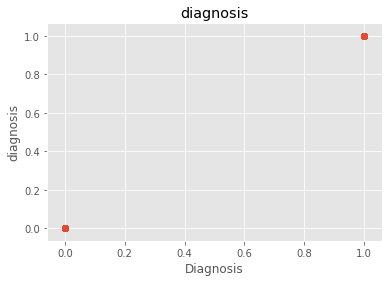

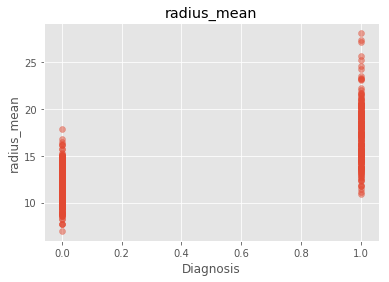

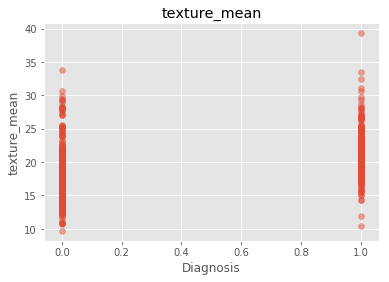

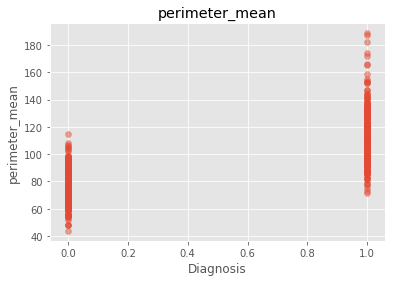

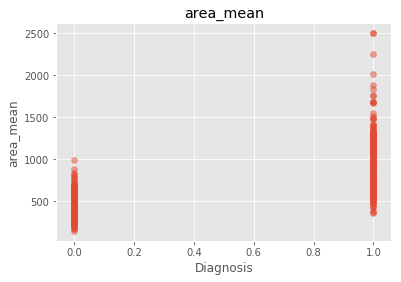

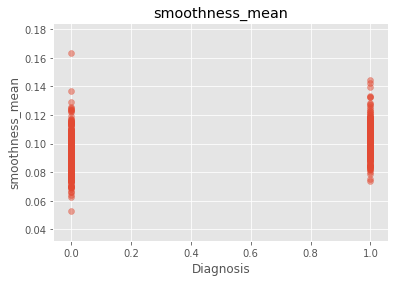

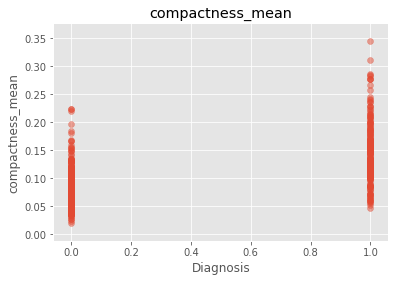

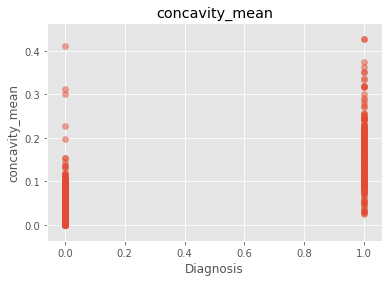

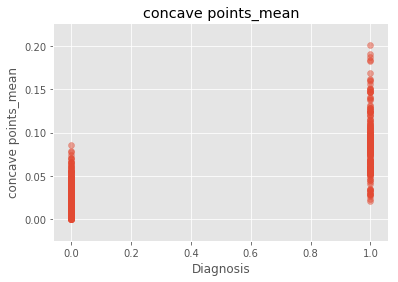

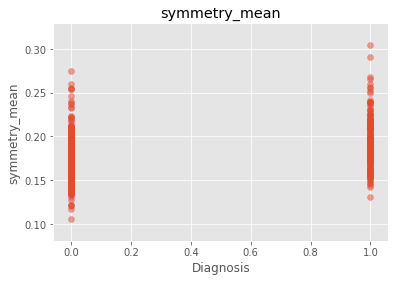

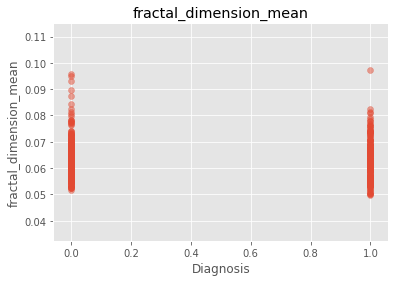

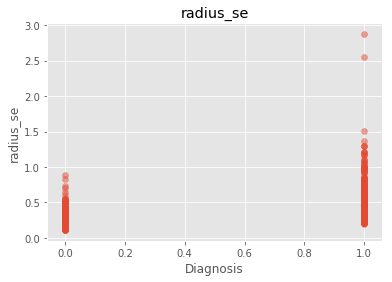

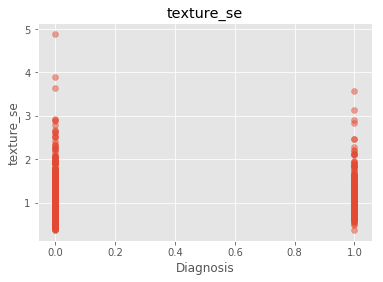

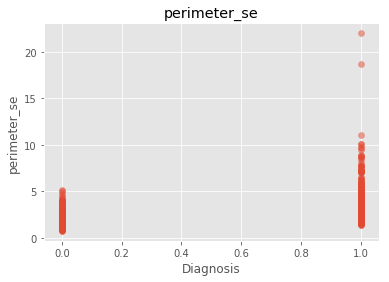

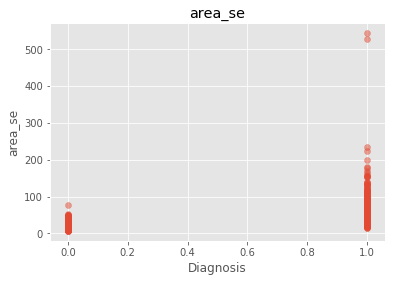

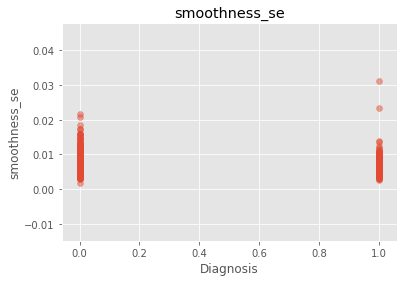

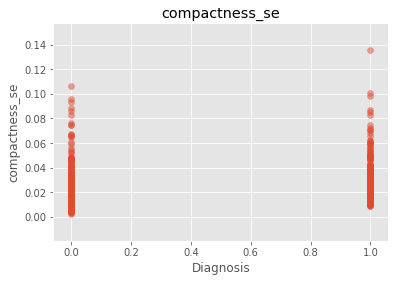

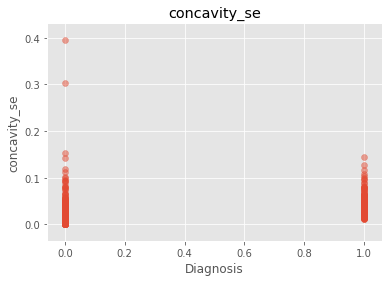

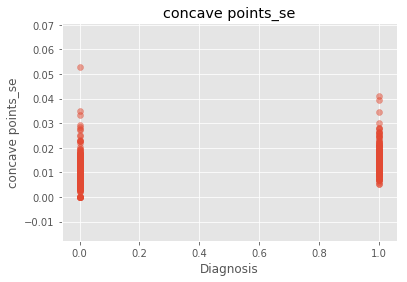

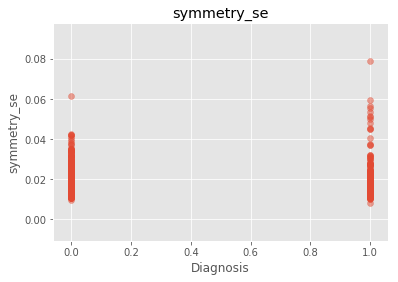

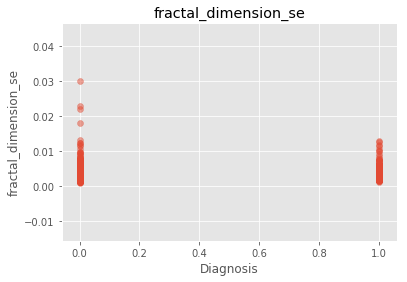

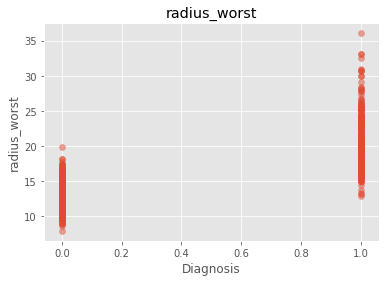

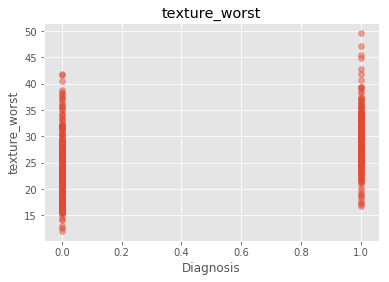

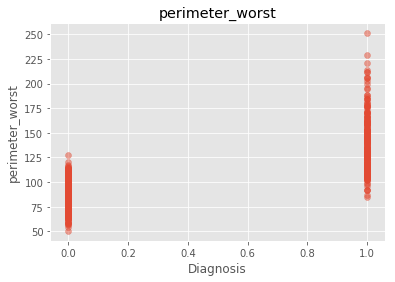

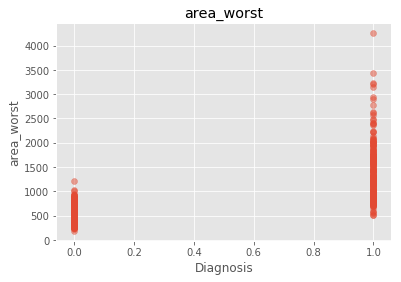

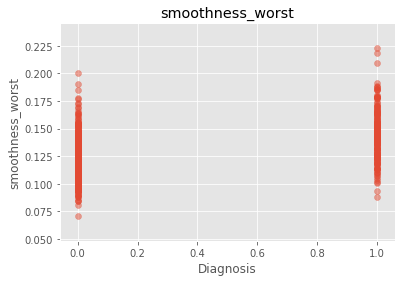

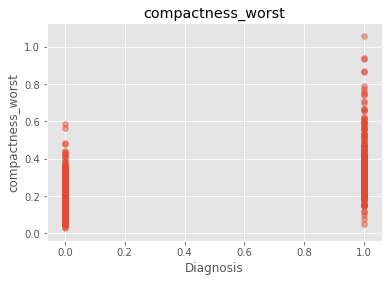

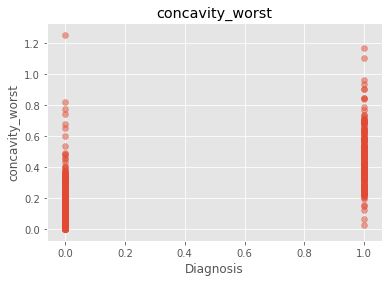

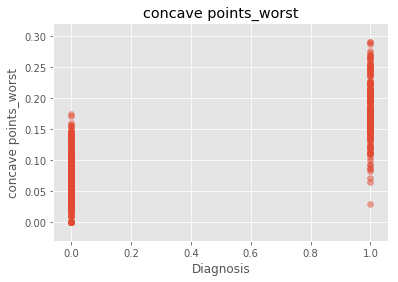

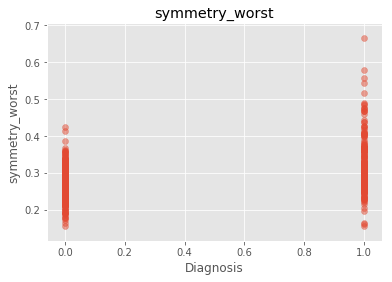

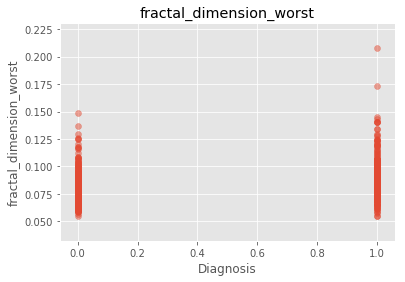

In [61]:
for n in cancer.columns:
    print(plot_scatter(n))

In [28]:
X_cancer = cancer.drop(["diagnosis"] , axis = 1)
y_cancer = cancer.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size = 0.3, random_state=42)

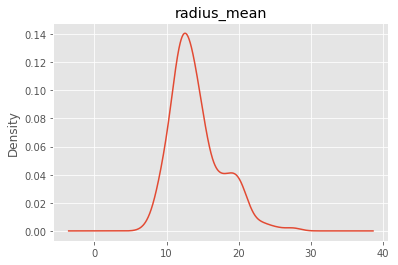

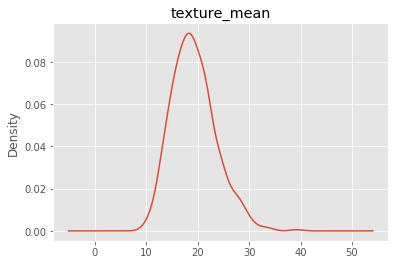

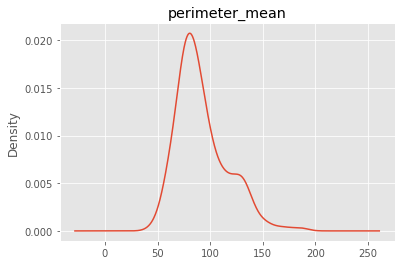

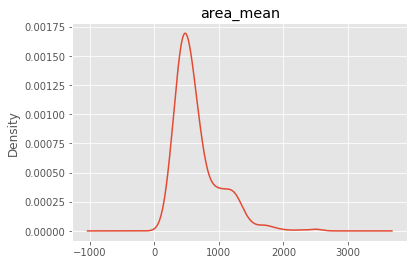

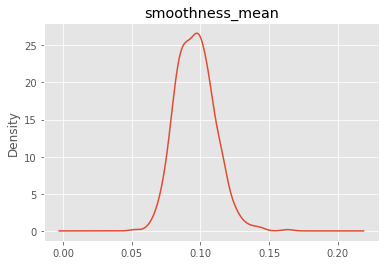

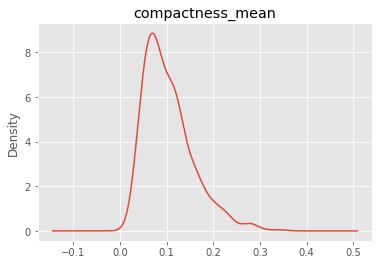

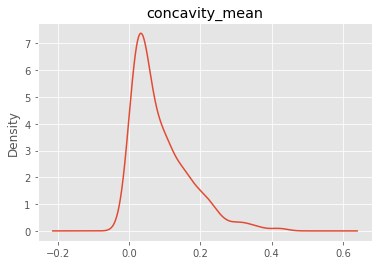

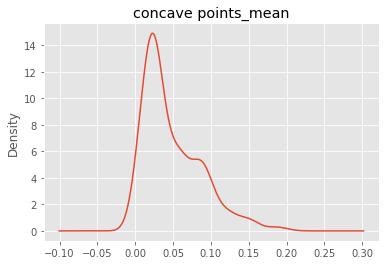

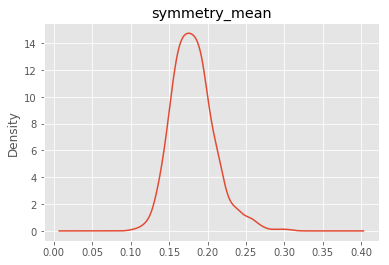

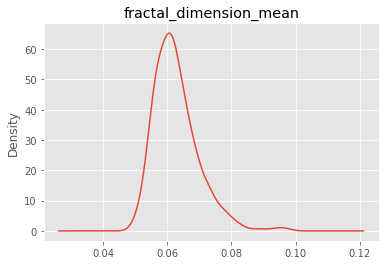

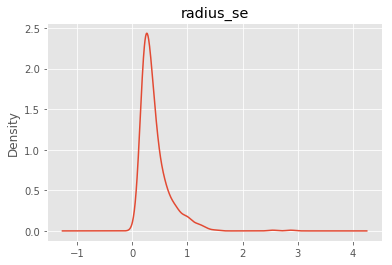

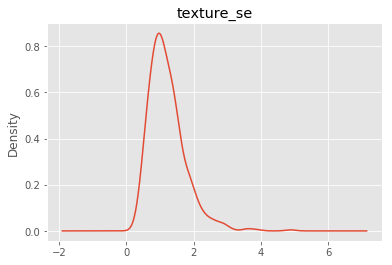

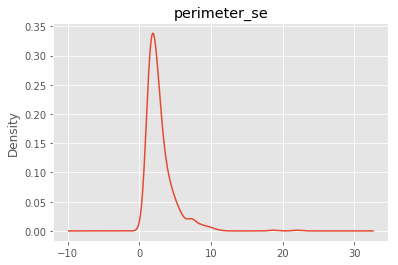

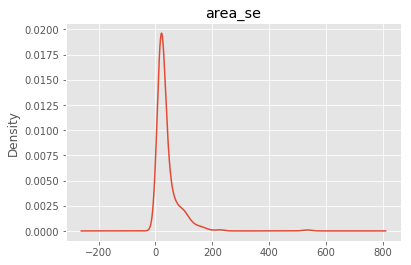

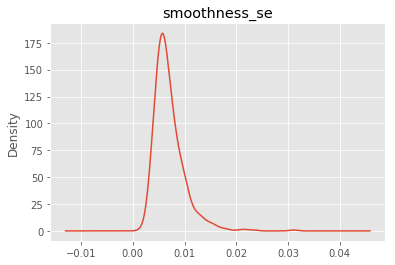

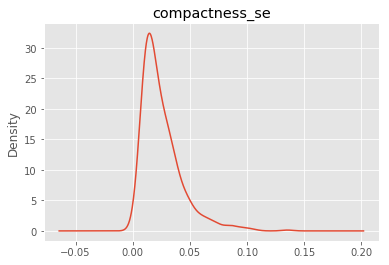

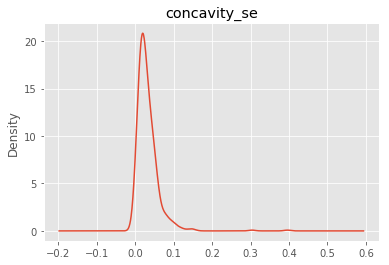

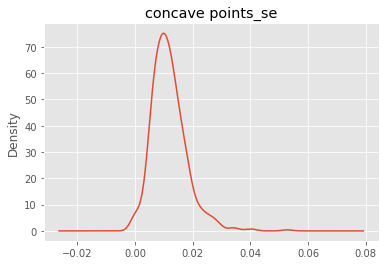

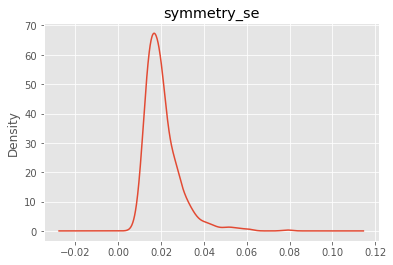

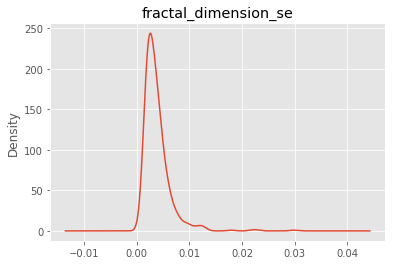

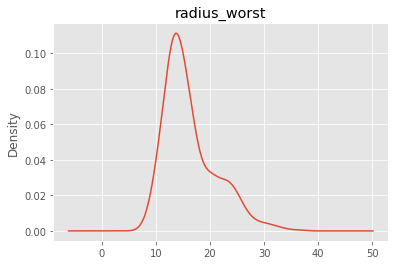

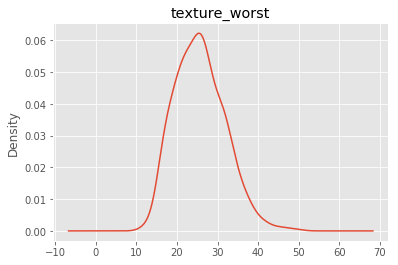

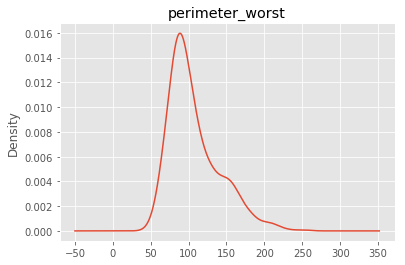

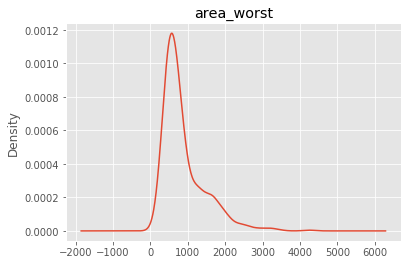

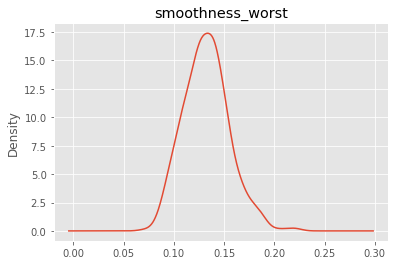

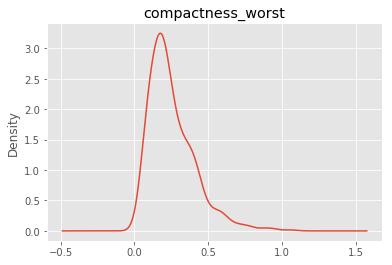

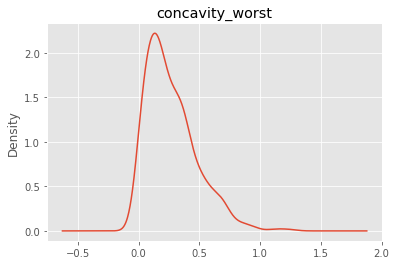

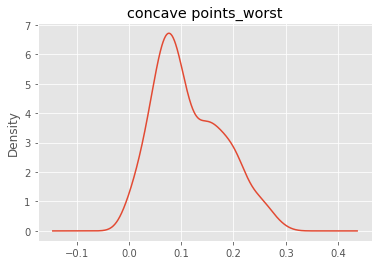

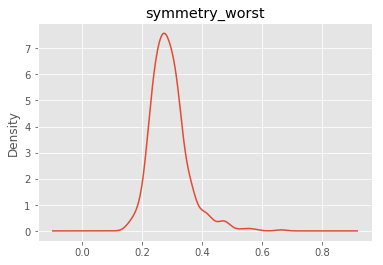

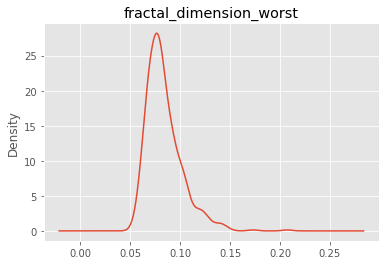

In [41]:
def plot_num(x):
    
    X_cancer[x].plot.kde()
    plt.title(X_cancer[x].astype(str).name)
    plt.show()
    return ""

for n in X_cancer:
    print(plot_num(n))

In [ ]:
# Logistic Regression

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train , y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test , y_pred))

[[106   2]
 [  4  59]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       108
          1       0.97      0.94      0.95        63

avg / total       0.96      0.96      0.96       171

0.9649122807017544


In [38]:
tree = DecisionTreeClassifier()

tree.fit(X_train , y_train)
y_pred = tree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test , y_pred))

[[98 10]
 [ 5 58]]
             precision    recall  f1-score   support

          0       0.95      0.91      0.93       108
          1       0.85      0.92      0.89        63

avg / total       0.92      0.91      0.91       171

0.9122807017543859


In [36]:
param_dist = {'max_depth' : [3,None],
             'max_features' : np.arange(1,9),
             'min_samples_leaf':np.arange(1,9),
             "criterion" :["gini" , "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree , param_dist , cv = 5 , verbose = 1)

tree_cv.fit(X_train , y_train)
y_pred_2 = pd.DataFrame(tree_cv.predict(X_test))
print(tree_cv.best_params_)
print(tree_cv.best_score_)
print(classification_report(y_test , y_pred_2))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


{'min_samples_leaf': 7, 'max_features': 6, 'max_depth': None, 'criterion': 'entropy'}
0.9346733668341709
             precision    recall  f1-score   support

          0       0.97      0.94      0.95       108
          1       0.90      0.95      0.92        63

avg / total       0.94      0.94      0.94       171

